In [1]:
from albumentations import HorizontalFlip,Compose,BboxParams

In [2]:
import torch
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
img_path = "/Users/matsunaganaoki/Desktop/DeepLearning/data/BBox/image-rabitt.jpg"
label_path = "/Users/matsunaganaoki/Desktop/DeepLearning/data/BBox/image-rabitt.txt"

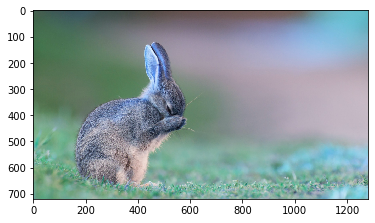

In [4]:
img = cv2.imread(img_path)
plt.imshow(img)

In [97]:
def draw_bbox(img,bbox):
    h,w,c = img.shape
    p1 = int(bbox[0]),int(bbox[1])
    p2 = int(bbox[2]),int(bbox[3])
    print(p1)
    print(p2)
    cv2.rectangle(img,p1,p2,(255,255,255),10)
    return img

In [100]:
h,w,c = img.shape
with open(label_path) as f:
    _,x0,y0,x1,y1 = f.read().split()
    bbox = [float(x0),float(y0),float(x1),float(y1)]
    bbox = [int((bbox[0]-bbox[2]/2)*w),int((bbox[1]-bbox[3]/2)*h),int((bbox[0]+bbox[2]/2)*w),int((bbox[1]+bbox[3]/2)*h)]

In [74]:
box_image = draw_bbox(img,bbox)

(122, 90)
(616, 683)


In [75]:
img.shape

(720, 1280, 3)

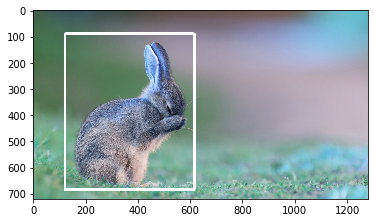

In [76]:
plt.imshow(box_image)

In [79]:
def get_aug(aug):
    return Compose(aug, bbox_params=BboxParams(format='pascal_voc',label_fields=['category_id']))

In [80]:
aug = get_aug([HorizontalFlip(p=1)])

In [90]:
annotations = {'image':img,'bboxes':[bbox],'category_id':[1]}

In [91]:
augmented = aug(**annotations)

(664, 90)
(1158, 683)


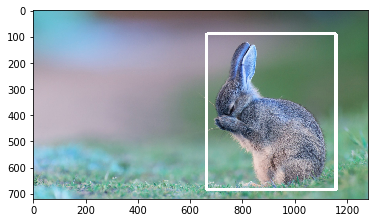

In [99]:
augmented['image']
img_ = draw_bbox(augmented['image'],augmented['bboxes'][0])
plt.imshow(img_)

In [109]:
from albumentations import BboxParams,HorizontalFlip,Resize,Compose

In [108]:
class PhotometricDistort(object):
    def __init__(self):
        self.pd = [
            RandomContrast(),
            ConvertColor(transform='HSV'),
            RandomSaturation(),
            RandomHue(),
            ConvertColor(current='HSV', transform='BGR'),
            RandomContrast()
        ]
        self.rand_brightness = RandomBrightness()
        self.rand_light_noise = RandomLightingNoise()

    def __call__(self, image, boxes, labels):
        im = image.copy()
        im, boxes, labels = self.rand_brightness(im, boxes, labels)
        if random.randint(2):
            distort = Compose(self.pd[:-1])
        else:
            distort = Compose(self.pd[1:])
        im, boxes, labels = distort(im, boxes, labels)
        return self.rand_light_noise(im, boxes, labels)

In [ ]:
class ImageBBoxTransform(object):
    def __init__(self,resize):
        self.data_transform = transforms.Compose([
            ConvertFromInts(),
                
            ]) 
        }

In [106]:
import random
a  =random.randint(2)

TypeError: randint() missing 1 required positional argument: 'b'